# Cyclistic Case Study

## Intro
The goal of this project is to gain insight into how casual riders and annual members differ in their usage of a bike-share company. Withing the company, the director of marketing believes that the company's future success depends on maximizing the number of annual memberships. Therefore, the insights found in this analysis will be used to design a digital marketing strategy aimed at converting casual riders into annual members. 

For the purpose of this study, **casual riders** are defined as customers who purchase single-ride or full-day passes, while **Cyclistic members** are customers who purchase an annual membership. 

In [1]:
# Importing data science libraries
import pandas as pd
import numpy as np
import glob
import os

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
import missingno as msno
import plotly.offline as pyo 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('fivethirtyeight')

In [2]:
# Importing the data
path = 'data'
csv_files = glob.glob(os.path.join(path, "*.csv"))

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

In [3]:
# Combining the data into a single data frame
df = pd.concat(dfs, ignore_index=True).drop_duplicates('ride_id') 

# Checking the combined data frame
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
5,F7D7420AFAC53CD9,electric_bike,2023-10-04 17:10:59,2023-10-04 17:25:21,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898124,-87.637533,41.921540,-87.653818,member
6,870B2D4CD112D7B7,electric_bike,2023-10-31 17:32:20,2023-10-31 17:44:20,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898177,-87.637549,41.921540,-87.653818,member
7,D9179D36E32D456C,classic_bike,2023-10-02 18:51:51,2023-10-02 18:57:09,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,casual
8,F8E131281F722FEF,classic_bike,2023-10-17 08:28:18,2023-10-17 08:50:03,Calumet Ave & 18th St,13102,Morgan St & Polk St,TA1307000130,41.857618,-87.619411,41.871737,-87.651030,member
9,91938B71748FA405,classic_bike,2023-10-17 19:17:38,2023-10-17 19:32:23,Wolcott Ave & Polk St,TA1309000064,Morgan St & Polk St,TA1307000130,41.871262,-87.673688,41.871737,-87.651030,member


In [4]:
df.shape

(5715482, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 610.5+ MB


In [7]:
# Converting `started_at` and `ended_at` to datetime format
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='mixed')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 610.5+ MB


In [8]:
# Sorting by datetime, most recent first
df.sort_values('started_at', ascending = False).head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1594323,7F02F9C9518DE899,electric_bike,2024-07-31 23:56:29.404,2024-07-31 23:59:06.026,Montrose Harbor,TA1308000012,NaN,NaN,41.963982,-87.638181,41.960000,-87.640000,member
1217211,D8EA77522CDD0963,electric_bike,2024-07-31 23:55:00.044,2024-07-31 23:58:09.805,Wilton Ave & Belmont Ave,TA1307000134,NaN,NaN,41.940232,-87.652944,41.950000,-87.650000,member
1098968,95217BF2C770F4DE,electric_bike,2024-07-31 23:54:26.535,2024-07-31 23:57:52.119,Stetson Ave & South Water St,TA1308000029,Cityfront Plaza Dr & Pioneer Ct,13427,41.886835,-87.622320,41.890573,-87.622072,casual
1028136,08C302BA8CA35FC2,electric_bike,2024-07-31 23:54:00.718,2024-07-31 23:55:50.961,State St & Chicago Ave,21544,NaN,NaN,41.896617,-87.628579,41.900000,-87.630000,casual
1253867,C4121F2D05CE827E,electric_bike,2024-07-31 23:53:36.244,2024-07-31 23:56:48.209,NaN,NaN,NaN,NaN,41.930000,-87.650000,41.930000,-87.650000,casual
1351965,51A1A9F12078A3A9,electric_bike,2024-07-31 23:53:25.120,2024-07-31 23:57:01.391,Wells St & Elm St,KA1504000135,Wells St & Huron St,TA1306000012,41.903222,-87.634324,41.894722,-87.634362,casual
1627284,F150109CFA419D6E,electric_bike,2024-07-31 23:53:13.100,2024-07-31 23:59:00.637,NaN,NaN,Clark St & Lincoln Ave,13179,41.930000,-87.650000,41.915689,-87.634600,member
1050922,AF0F739C3F723C91,electric_bike,2024-07-31 23:52:35.503,2024-07-31 23:55:43.916,Halsted St & Wrightwood Ave,TA1309000061,NaN,NaN,41.929143,-87.649077,41.930000,-87.650000,member
1085365,5916FA2F813E5E74,electric_bike,2024-07-31 23:52:31.416,2024-07-31 23:55:21.415,Sheridan Rd & Irving Park Rd,13063,NaN,NaN,41.954245,-87.654406,41.960000,-87.650000,member
1655166,6441AE460141DB52,electric_bike,2024-07-31 23:52:14.182,2024-07-31 23:59:06.039,Clarendon Ave & Junior Ter,13389,Pine Grove Ave & Waveland Ave,TA1307000150,41.961004,-87.649603,41.949473,-87.646453,casual


## Cleaning the data
Next we will look for missing values and duplicates and figure out how to deal with them. 

In [9]:
# Checking if there are any missing values across each column

df.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [10]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    947002
start_station_id      947002
end_station_name      989396
end_station_id        989396
start_lat                  0
start_lng                  0
end_lat                 7716
end_lng                 7716
member_casual              0
dtype: int64

<Axes: >

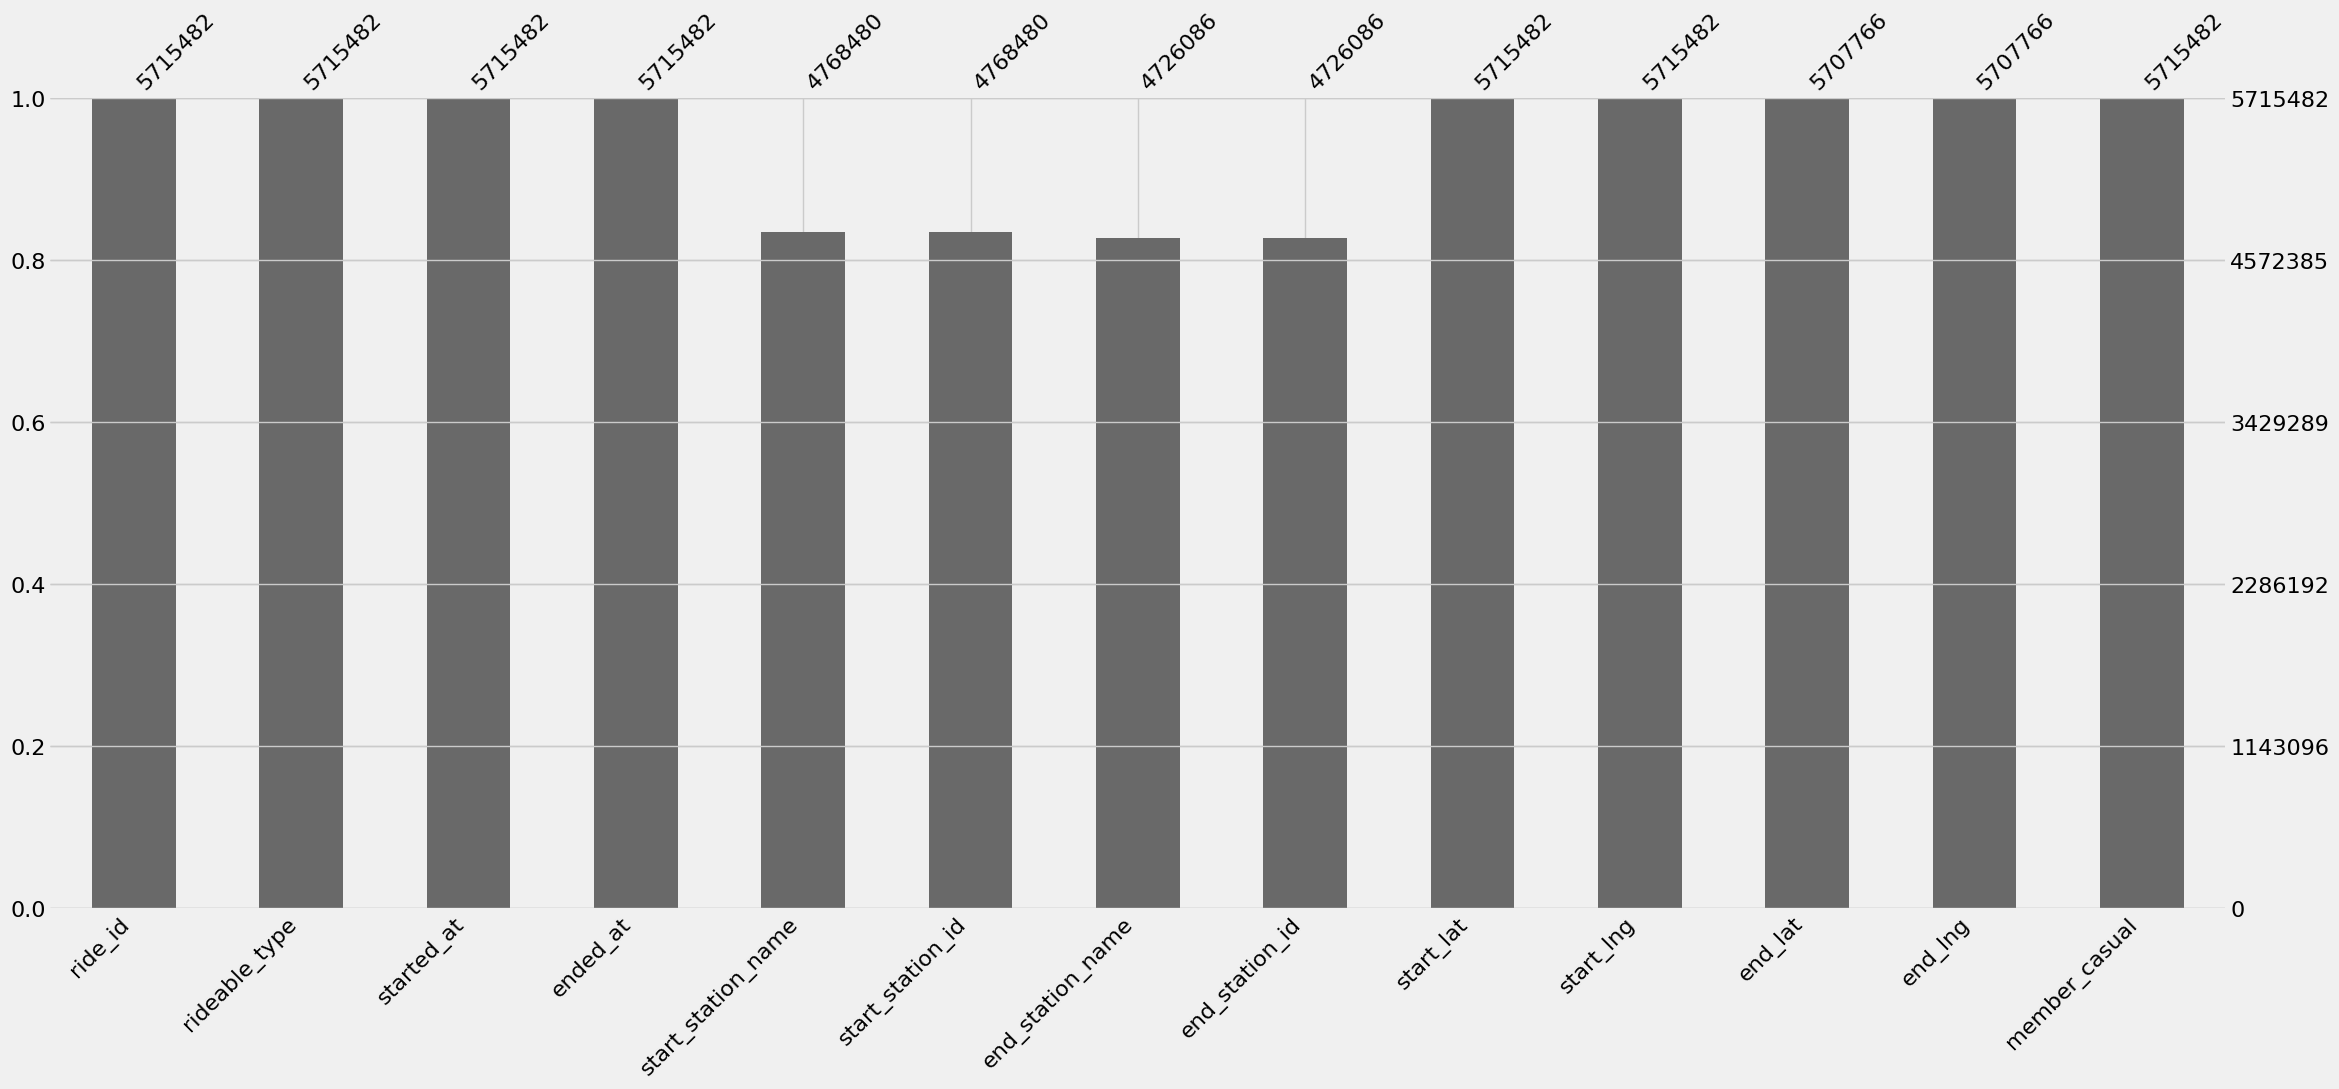

In [11]:
msno.bar(df)

<Axes: >

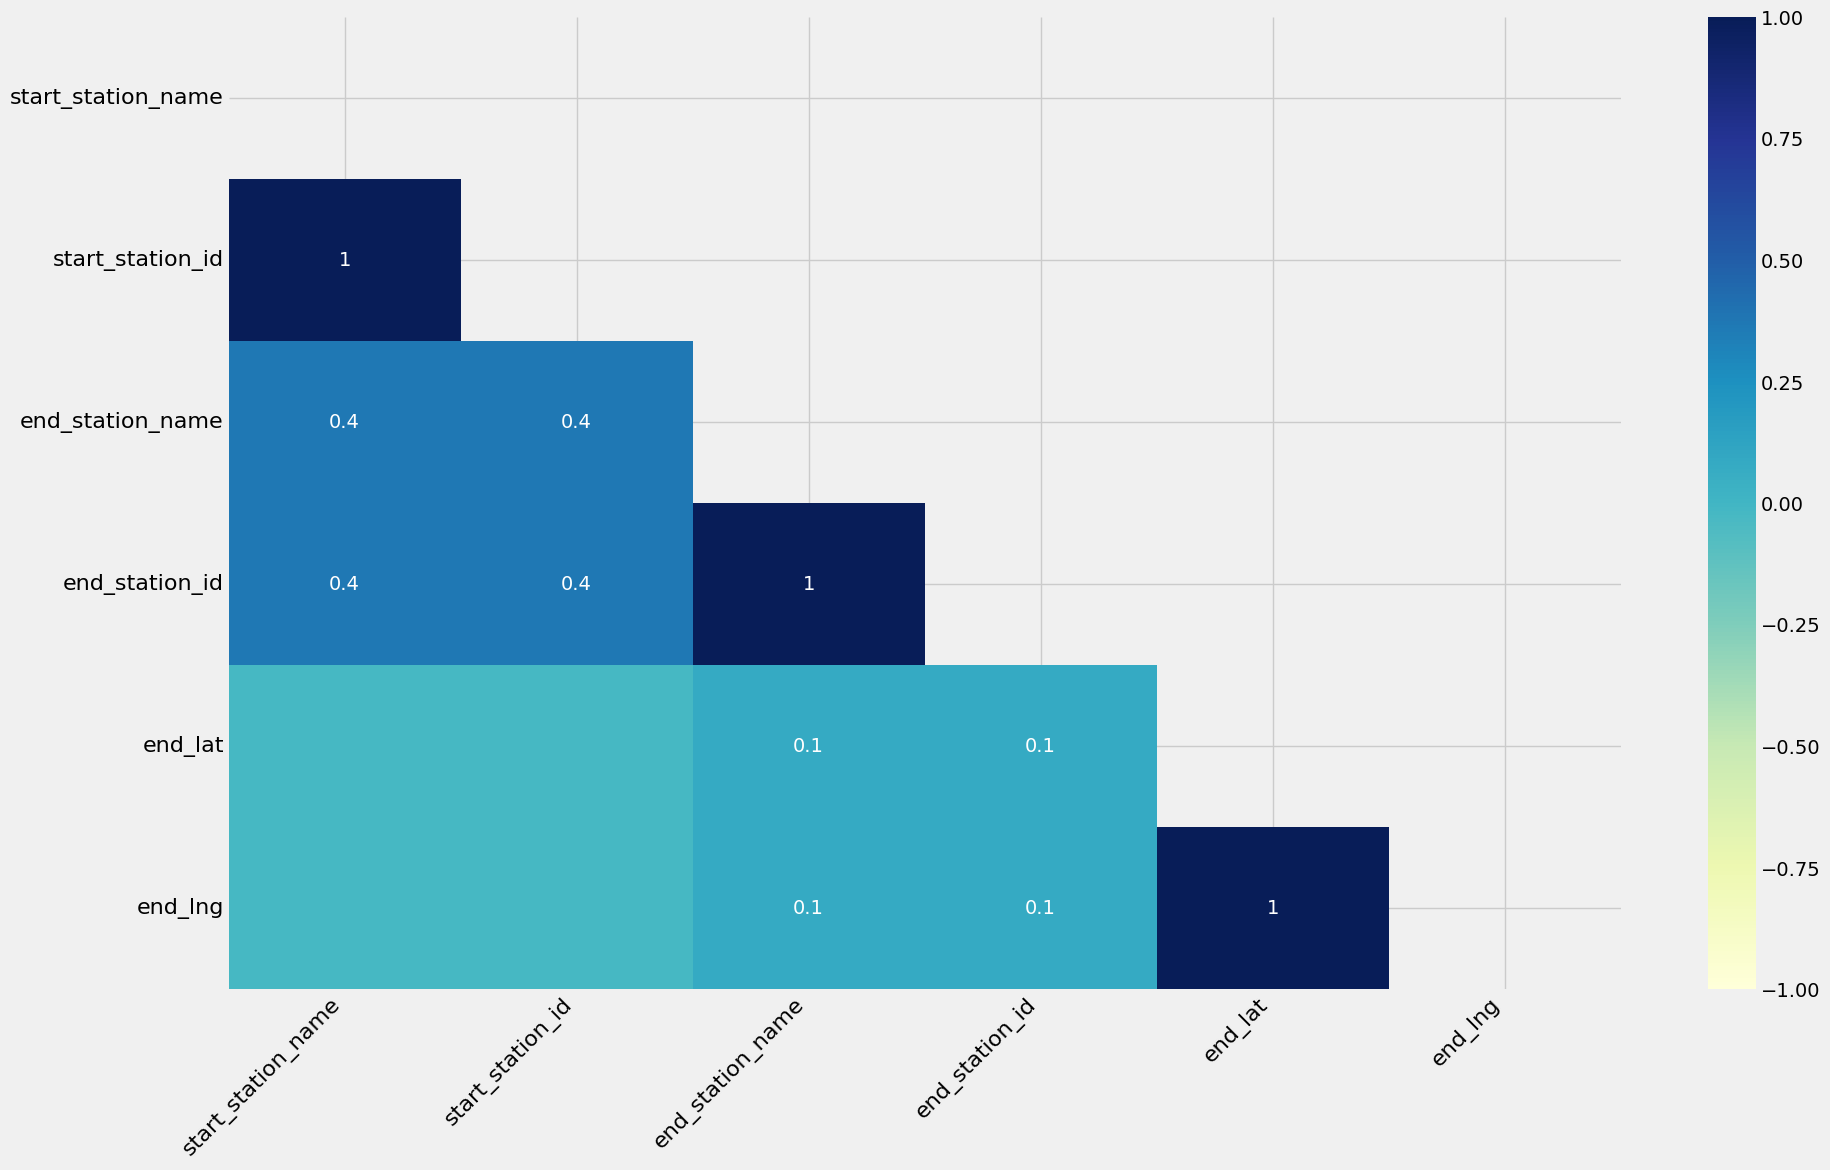

In [12]:
msno.heatmap(df, cmap='YlGnBu')

<Axes: >

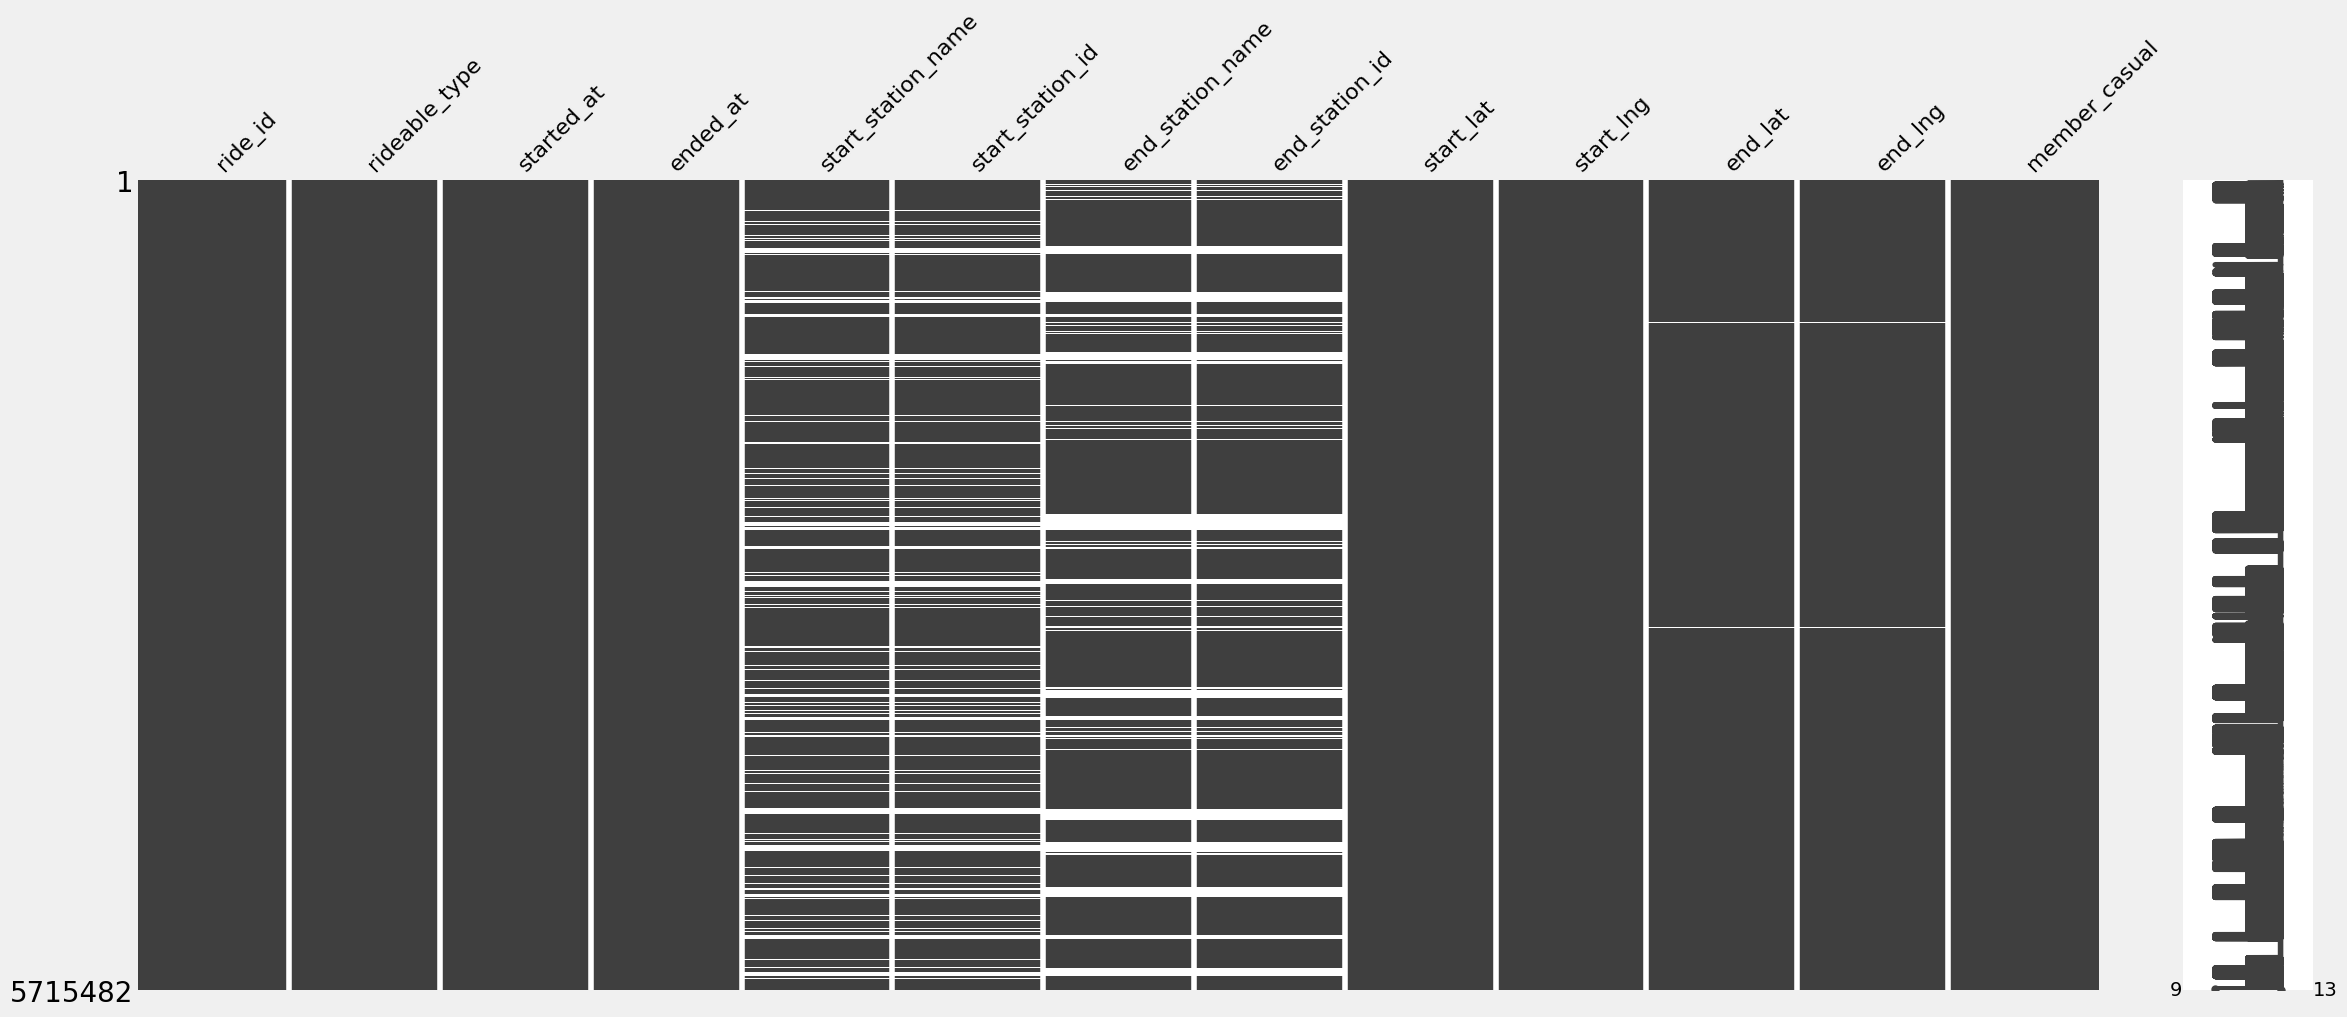

In [13]:
msno.matrix(df)

In [14]:
# Replacing missing values
df['start_station_name'] = df['start_station_name'].fillna('Unknown')
df['start_station_id'] = df['start_station_id'].fillna('Unknown')
df['end_station_name'] = df['end_station_name'].fillna('Unknown')
df['end_station_id'] = df['end_station_id'].fillna('Unknown')

cd_u = df.loc[df['start_station_name'] == 'Unknown'].sample(n = 100)

cd_u.head(30)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
460774,03DC17C7B101F847,electric_bike,2023-10-07 13:24:40.000,2023-10-07 13:26:20.000,Unknown,Unknown,Clarendon Ave & Junior Ter,13389,41.96,-87.65,41.961004,-87.649603,member
1281987,621131642F4DECFF,electric_bike,2024-07-27 13:48:06.094,2024-07-27 13:57:16.333,Unknown,Unknown,Unknown,Unknown,41.91,-87.62,41.930000,-87.640000,casual
5488606,B7CC13C3AAAED8CA,electric_bike,2023-11-19 11:35:32.000,2023-11-19 11:41:29.000,Unknown,Unknown,Clarendon Ave & Gordon Ter,13379,41.97,-87.66,41.957867,-87.649505,member
2850093,5C66746A3733D505,electric_bike,2024-03-03 16:34:15.000,2024-03-03 16:39:09.000,Unknown,Unknown,Unknown,Unknown,41.88,-87.65,41.870000,-87.660000,member
2433475,4840801EFAE0DA2A,electric_bike,2023-08-15 18:03:18.000,2023-08-15 18:18:20.000,Unknown,Unknown,Unknown,Unknown,41.91,-87.63,41.950000,-87.660000,casual
3628143,01905FE346BB3797,electric_bike,2023-09-06 15:43:18.000,2023-09-06 15:58:28.000,Unknown,Unknown,Unknown,Unknown,41.92,-87.73,41.920000,-87.770000,member
2881481,31DC9B59019F7C9B,electric_bike,2024-03-23 13:15:57.000,2024-03-23 13:25:45.000,Unknown,Unknown,Leavitt St & Addison St,KA1504000143,41.93,-87.69,41.946655,-87.683359,casual
3350702,84C4C615DDC8DBBD,electric_bike,2023-09-06 11:23:59.000,2023-09-06 11:30:30.000,Unknown,Unknown,Wood St & Milwaukee Ave,13221,41.92,-87.69,41.907655,-87.672552,casual
4470484,1FDF787519A5E1FF,electric_bike,2024-06-02 09:21:14.887,2024-06-02 09:26:08.472,Unknown,Unknown,Unknown,Unknown,41.93,-87.71,41.930000,-87.720000,casual
483408,B324ED83F9E2CD34,electric_bike,2023-10-22 18:54:11.000,2023-10-22 19:07:42.000,Unknown,Unknown,Unknown,Unknown,41.80,-87.59,41.780000,-87.600000,member


In [15]:
fig = px.scatter_geo(cd_u, lat='start_lat', lon='start_lng',
                     title='Unknown Start Station Name')
fig.show()

In [16]:
df['start_station_name'].loc[df['start_station_name'] != 'Unknown'].value_counts()

start_station_name
Streeter Dr & Grand Ave                  63675
DuSable Lake Shore Dr & Monroe St        41624
Michigan Ave & Oak St                    38367
DuSable Lake Shore Dr & North Blvd       37837
Kingsbury St & Kinzie St                 35995
                                         ...  
Public Rack - Horner & 85th                  1
Public Rack - Princeton Ave & 99th Pl        1
Public Rack - Ewing Ave & 96th St S          1
Public Rack - Ashland Ave & 45th St          1
Public Rack - Pulaski & 84th                 1
Name: count, Length: 1705, dtype: int64

In [17]:
d1 = df['started_at']
d2 = df['ended_at']

diff = d2-d1
df['duration'] = diff
df['duration'].head()

0   0 days 00:12:53
1   0 days 00:12:09
2   0 days 00:04:20
3   0 days 00:05:26
4   0 days 00:11:30
Name: duration, dtype: timedelta64[ns]

In [18]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30


In [19]:
# Looking at the average ride time for members vs. casual riders

mc = df.groupby(df['member_casual'])
mc_duration = mc['duration'].mean()

print(mc_duration)

member_casual
casual   0 days 00:27:06.764142763
member   0 days 00:12:58.785200452
Name: duration, dtype: timedelta64[ns]


## Observation #1
The average member pass ride is less than half the time of the average casual pass ride. It is unfortunate that there is not a way to parse out the casual pass rides into daily and single-ride passes. We can learn from this though that members' rides are usually shorter than the casual rides. 

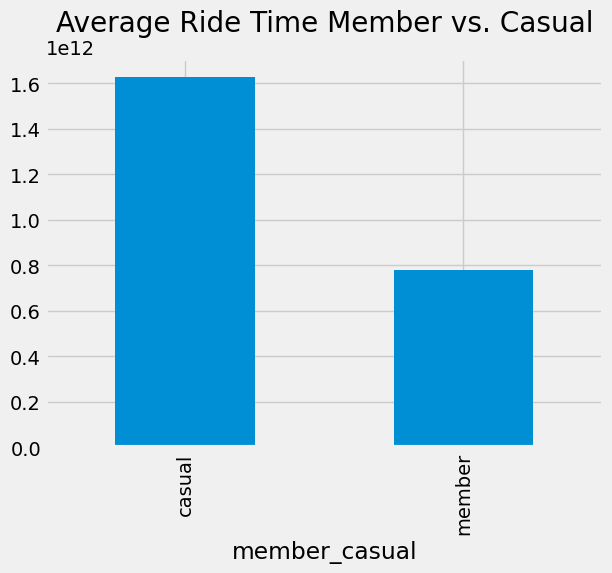

In [20]:
ax = mc['duration'].mean().plot(kind='bar', title='Average Ride Time Member vs. Casual')

In [21]:
# Creating a simple data frame that shows the difference in average ride time between casual and member ride times.
art_data = {'casual' : [27.12],
        'member' : [12.98]}

art = pd.DataFrame(art_data, index=['avg_minutes'])

print(art)

             casual  member
avg_minutes   27.12   12.98


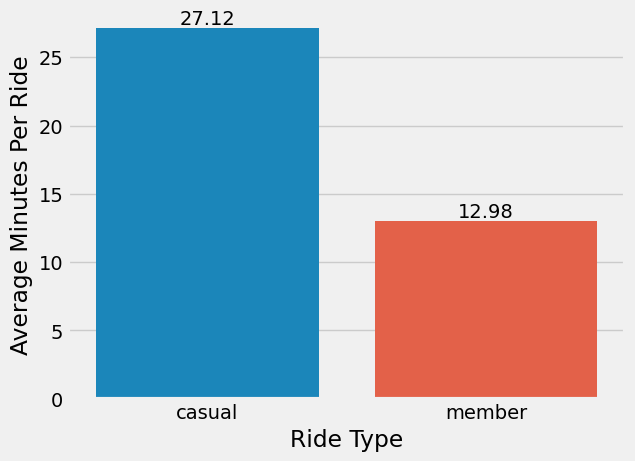

In [22]:
# Visualizing to show the stark difference in average ride times. 

ax = sns.barplot(art)

for i in ax.containers:
    ax.bar_label(i,)
    ax.set(xlabel='Ride Type', ylabel='Average Minutes Per Ride')

In [23]:
# Now looking at the number of bike rental events for members vs. casual riders. 

df['member_casual'].value_counts()

member_casual
member    3677040
casual    2038442
Name: count, dtype: int64

## Observation #2
So we've found that the average ride time for casual riders is much higher than members, but we've now seen that the number of rental events for members is much higher than the number of casual rider rentals. 

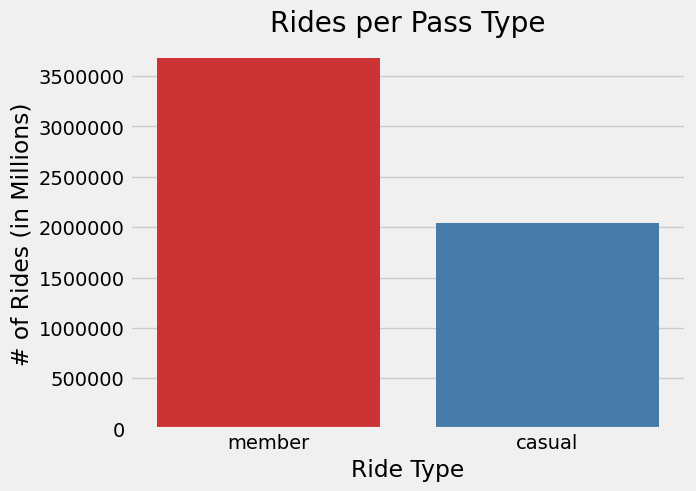

In [24]:
from matplotlib import ticker
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# additional code before plt.show()
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)

ax = sns.barplot(df['member_casual'].value_counts(), palette='Set1')
plt.xlabel("Ride Type")
plt.ylabel("# of Rides (in Millions)")
plt.title("Rides per Pass Type")
ax.yaxis.set_major_formatter(formatter)

Still in progress...to be continued